In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sklearn as skl
from scipy.fftpack import fft, ifft, dct, idct

In [2]:
rawData = pdr.DataReader("SI=F", 
                       start='2019-1-1', 
                       end='2019-12-31', 
                       data_source='yahoo')

rawData.describe()

,High,Low,Open,Close,Volume,Adj Close
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,16.224173,16.099245,16.173217,16.153855,2087.618474,16.153855
std,1.224427,1.172634,1.203125,1.193147,12010.163442,1.193147
min,14.310000,14.245000,14.300000,14.281000,0.000000,14.281000
25%,15.185000,15.043000,15.140000,15.068000,4.000000,15.068000
50%,15.837000,15.790000,15.820000,15.791000,27.000000,15.791000
75%,17.188000,17.100000,17.156000,17.125000,103.000000,17.125000
max,19.540001,19.215000,19.485001,19.391001,97738.000000,19.391001


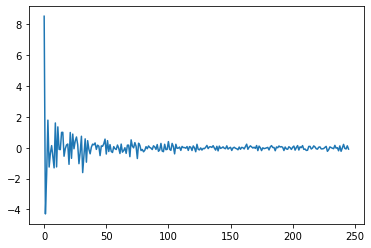

In [3]:
inputs = rawData['Open'].to_numpy()
N = len(rawData)
T = 0.125
y = dct(inputs, norm = 'ortho' )
plt.plot(y[3:])

In [4]:
print( y.min(), np.quantile(y, 0.25), y.mean(), np.quantile(y, 0.75), y.max() )

-14.422173535321972 -0.11567985684876769 0.9918605898088392 0.10724023260564199 255.20905762764002


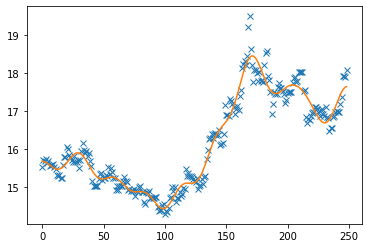

In [5]:
y1 = y
y1[20:] = 0
extracts = idct(y1, norm = "ortho")
plt.plot( inputs, "x" )
plt.plot( extracts)

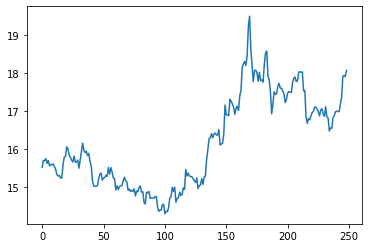

In [6]:
plt.plot(inputs)

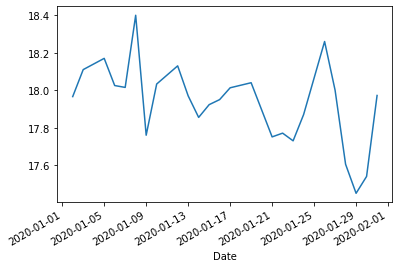

In [7]:
rawData = pdr.DataReader("SI=F", 
                       start='2020-1-1', 
                       end='2020-1-31', 
                       data_source='yahoo')
rawData['Open'].plot()

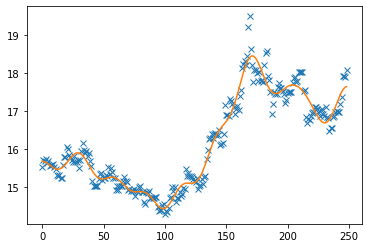

In [8]:
highFs = []
p = 0
for i in y:
    if np.abs(i) > np.quantile(y, 0.75):
        highFs.insert(p,i)
        p += 1
        # highFs.append(i)
    else:
        highFs.append(0)
extracts2 = idct(highFs, norm = "ortho")
plt.plot( inputs, "x" )
plt.plot( extracts2)

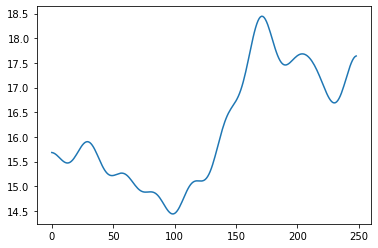

In [15]:
plt.plot( extracts2)